In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the google word2vec model

from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

unable to import 'smart_open.gcs', disabling that module


In [4]:
data_raw = pd.read_csv("test_data_2.csv")

In [5]:
data_raw.head()

id                                       comment_text  toxic  \
0  00091c35fa9d0465  == Arabs are committing genocide in Iraq, but ...      1   
1  0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...      1   
2  0017d4d47894af05               :Fuck off, you anti-semitic cunt.  |      1   
3  001d739c97bc2ae4  How dare you vandalize that page about the HMS...      1   
4  001eff4007dbb65b  ::No, he is an arrogant, self serving, immatur...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        1       0       1              1  
2             0        1       0       1              0  
3             0        0       0       0              0  
4             0        1       0       1              0

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [7]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

In [8]:
data = data_raw
data.shape

(6231, 8)

In [9]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [10]:
import nltk
from nltk.corpus import stopwords
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [11]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

id                                       comment_text  toxic  \
0  00091c35fa9d0465  arabs are committing genocide in iraq but no p...      1   
1  0013fed3aeae76b7  dj robinson is gay as hell he sucks his dick s...      1   
2  0017d4d47894af05                     fuck off you anti semitic cunt      1   
3  001d739c97bc2ae4  how dare you vandalize that page about the hms...      1   
4  001eff4007dbb65b  no he is an arrogant self serving immature idi...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        1       0       1              1  
2             0        1       0       1              0  
3             0        0       0       0              0  
4             0        1       0       1              0

In [12]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

id                                       comment_text  toxic  \
0  00091c35fa9d0465  arabs  committing genocide  iraq   protests  e...      1   
1  0013fed3aeae76b7          dj robinson  gay  hell  sucks  dick  much      1   
2  0017d4d47894af05                           fuck   anti semitic cunt      1   
3  001d739c97bc2ae4   dare  vandalize  page   hms beagle dont vanda...      1   
4  001eff4007dbb65b      arrogant self serving immature idiot get  ...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        1       0       1              1  
2             0        1       0       1              0  
3             0        0       0       0              0  
4             0        1       0       1              0

In [13]:
data['comment_text'] = data['comment_text'].str.lower()

In [14]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t in model.wv.vocab]
    return cleaned_text

def preprocess():
    # For gensim we need to tokenize the data and filter out stopwords
    tokenized_data = []
    for text in data.comment_text.values:
        tokenized_data.append(clean_text(text))
    return tokenized_data

In [15]:
np_array = preprocess()

In [16]:
np.save('toxic_classification_testdata_2.npy', np_array)

In [17]:
labels = data[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values

In [18]:
np.save('toxic_classification_testlabel_2.npy', labels)

In [20]:
y_test = np.load('toxic_classification_testlabel_2.npy')

#FIND THE DISTRIBUTION OF LABELS

cnt_label_1 = 0
cnt_label_2 = 0
cnt_label_3 = 0
cnt_label_4 = 0
cnt_label_5 = 0
cnt_label_6 = 0
cnt_label_1_6 = 0

for val in y_test.tolist():
    if val[0] == 1:
        cnt_label_1  += 1
    if val[1] == 1:
        cnt_label_2  += 1
    if val[2] == 1:
        cnt_label_3  += 1
    if val[3] == 1:
        cnt_label_4  += 1
    if val[4] == 1:
        cnt_label_5  += 1
    if val[5] == 1:
        cnt_label_6  += 1        
distribution_1 = [cnt_label_1, cnt_label_2, cnt_label_3, cnt_label_4, cnt_label_5, cnt_label_6]
print(distribution_1)

[6078, 366, 3684, 211, 3420, 707]


No handles with labels found to put in legend.


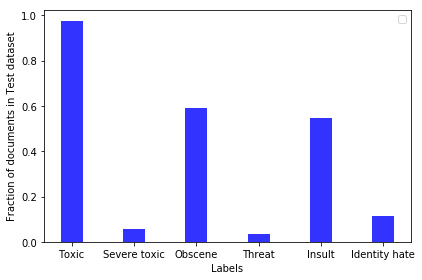

In [4]:
import matplotlib.pyplot as plt

n_groups = 6
k_fold = ["Toxic", "Severe toxic", "Obscene", "Threat", "Insult", "Identity hate"]
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects2 = plt.bar(index + 0.5*bar_width, np.array(distribution_1)/y_test.shape[0], bar_width,
    align = 'edge',
    alpha=opacity,
    color='b')

plt.xlabel('Labels')
plt.ylabel('Fraction of documents in Test dataset')
plt.xticks(index + bar_width, k_fold)
plt.legend()

plt.tight_layout()
plt.show()